# TO DO 

- Classification
    - Bayesian network 
    - SVM 
        - tunjukkan algoritma
    - hierarchical agglomerative methods (buat dendongram) 
- Sequence Pattern 
    - prefix span, menggunakan data belanja
    - contoh data [data belanja](https://www.kaggle.com/datatheque/association-rules-mining-market-basket-analysis)
- Density base clustering 
    - k-means
    - [ ] Agglomerative clustering 
- Probabilistic Model Clustering
    - gaussian mixture models (extension dari kmeans)
        - [in depth gmm](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)


## What is the data?

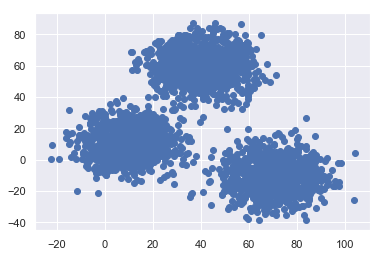

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd 

# X,y_true = make_blobs(n_samples = 400, 
#                       centers = 4, 
#                       cluster_std=0.8, 
#                       random_state=0)
# X = X[:, ::-1]
# print(y_true)

data = pd.read_csv('xclara.csv')
X = data.values
y_true = data['V2'].values
plt.scatter(X[:,0],X[:,1])

# K-Means
- ambil sembarang posisi k centroid 
- ambil jarak euclidean minimum dari $$ \arg \min_{c_i \in C} dist(c_{i},x)^2$$  
- ambil centroid baru dengan menghitung rata-rata dari seluruh point yang assign ke dalam cluster lama $$ c_{i} = \frac{1}{S_{i}} \sum_{x_{i} \in s_{i}} $$   
- repeat until it converges

## checking convergency
![](https://i.imgur.com/k3o6NxK.jpg)


**pisahkan label sebagai y, X sebagai training data**

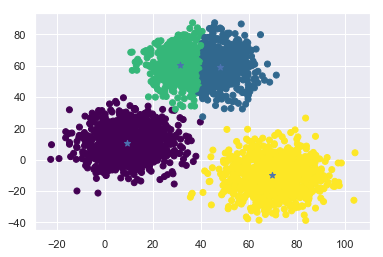

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random',n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],s=40,marker='*')

**visualize**

In [3]:
#define kmeans visualization 
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels=kmeans.fit_predict(X)
    print(labels)
    #plot input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(kmeans.cluster_centers_[:,0],
              kmeans.cluster_centers_[:,1],
              s=250,
              c='red',
              label='centroids')

    #plot representation of kmeans model 
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i],[center]).max()
            for i, center in enumerate(centers)]
    print([x for x in centers])
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='viridis',zorder=2)
    
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    plt.scatter(centers[:,0],centers[:,1], c='black',s=200)


[2 2 2 ... 0 0 0]
[array([ 69.92418447, -10.11964119]), array([48.38980073, 59.93652114]), array([ 9.43391214, 10.63898036]), array([32.10293593, 59.36915905])]


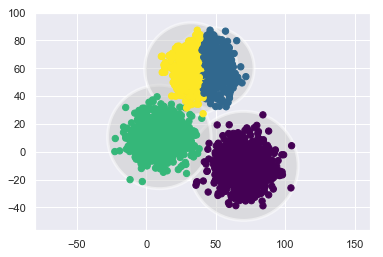

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)
#kmeans always circular, or oblong.

[1 1 1 ... 3 3 3]
[array([-35.12165603,  62.00895763]), array([-6.34823124, 10.8219593 ]), array([-26.5076147 ,  42.51804931]), array([-51.16989111,  50.20980607])]


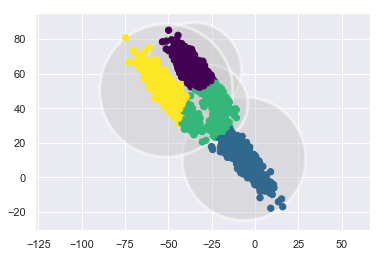

In [5]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)
#non circular set, transformed to circular 

# Gaussian Mixture Model 
## gmm merupakan *probstat*
mirip dengan k-means, dengan menggunakan pendekatan expectation-maximization
1. ambil random untuk lokasi centroid dan bentuk 
2. repeat sampai konvergen 
    - *e-step*: tiap point, temukan "encoding weight" dengan kemungkinan titik di tiap cluster
    - *m-step*: tiap centroid, update lokasi, normalisasi dan bentuk dari seluruh data point, untuk membuat weight

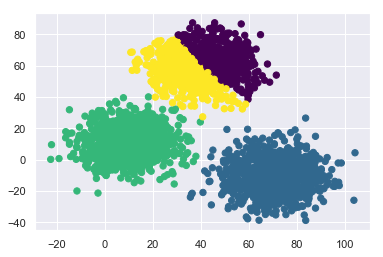

In [6]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

*gmm contains probablistic models* jadi bisa menunjukkan probabilistic cluster dengan menggunakan `predict_proba` yang return matrix `[n_samples, n_clusters]`

In [7]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


array([49.99999975, 49.99994992, 49.99999998, ..., 49.99999671,
       50.        , 49.99999992])

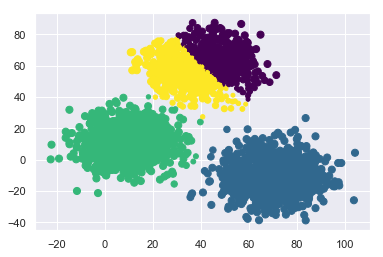

In [8]:
size = 50 * probs.max(1)**2 #dikuadratkan biar perbedaanya terlihat
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
size

In [9]:
#visualisasi 
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs): 
    ax = plt.gca()
    
    #convert konvarians ke axis
    if covariance.shape == (2,2):
        U, s, Vt= np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width, height = 2*np.sqrt(s)
    else: 
        angle=0
        width,height=2*np.sqrt(covariance)
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

In [10]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels=gmm.fit(X).predict(X)
    if label: 
        ax.scatter(X[:, 0],X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else: 
        ax.scatater(X[:,0],X[:, 1], s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(position, covariance, alpha=w*w_factor)

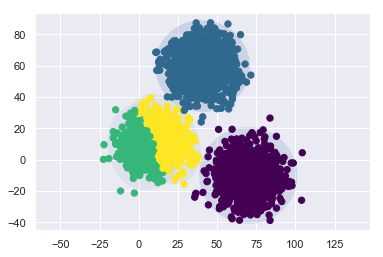

In [11]:
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state=0)
plot_gmm(gmm,X)

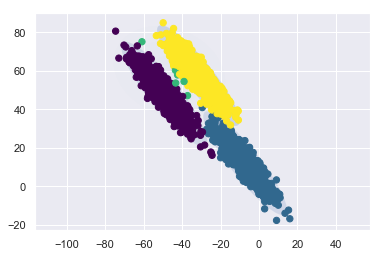

In [12]:
gmm2 = GaussianMixture(n_components = 4, random_state=0)
plot_gmm(gmm2,X_stretched)

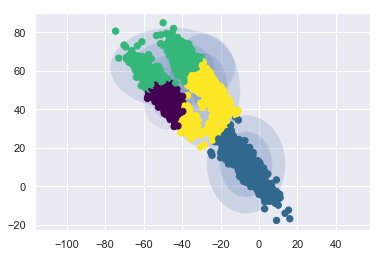

In [13]:
gmm = GaussianMixture(n_components = 4, covariance_type='diag', random_state=0)
plot_gmm(gmm,X_stretched)

## check optimal components
akaike information criterion, bayesian information criterion

In [14]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
         for n in n_components]

Text(0.5,0,'n_components')

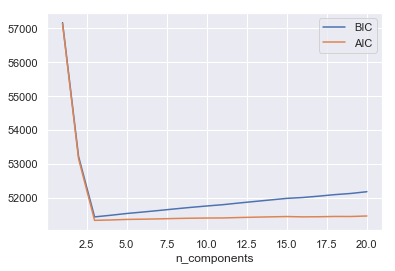

In [15]:
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

berarti
AIC = 3-5
BIC = 3-5

# Bayesian Network Classification 

$$ P(L|features) = \frac{P(features|L_{i})P(L_{i})}{P(features)} $$ 

(-28.85123565082594, 110.73184565082595, -45.11884579514591, 93.6370457951459)

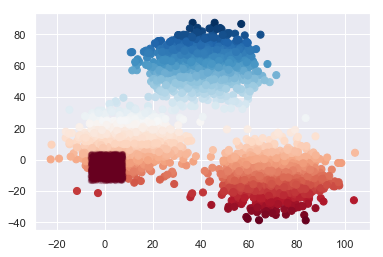

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,labels)
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [17]:
yprob = model.predict_proba(Xnew)
yprob[:-8].round(2)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# SVM 
separation of classes, membagi menggunakan garis jika linear, menggunakan hyper-plane jika multidimensional   
![](https://docs.opencv.org/2.4/_images/optimal-hyperplane.png)    
**objektif**: optimizing margin, dimana margin didefinisikan sebagai separating hyperplane

$$ W_{0} + w^T x_{pos} = 1  ... (1) $$
$$ W_{0} + w^T x_{neg} = -1 ... (2) $$

Dari sini didapat hasil dari (1) dan (2)

$$ \Rightarrow w^T(X_{pos} - X_{neg}) = 2 $$



In [18]:
y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)

In [19]:
X_train
from sklearn.svm import SVC, LinearSVC
c=20
models = (SVC(kernel='linear', C=c),
          LinearSVC(C=c),
          SVC(kernel='rbf',gamma=0.9, C=c),
          SVC(kernel='poly', degree=6,C=c)
         )
#merubah gamma biar lebih fit, cut off parameter untuk hyperplane (effects decision boundary)
models = (classifier.fit(X_train, Y_train) for classifier in models)
judul = ('SVC with linear kernel',
        'Linear SVC with linear kernel',
        'SVC with rbf kernel',
        'SVC with polynomial 3rd degree kernel')

svc = SVC(kernel='rbf',C=1, gamma=1)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,y_pred)

0.9125

In [ ]:

def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, sub = plt.subplots(2,2,figsize=(15,15))
plt.subplots_adjust(wspace=.4, hspace=.4)

X0, X1 = X[:,0],X[:,1]
xx,yy = make_meshgrid(X0,X1)
for classifier, title, ax in zip(models, judul, sub.flatten()):
    plot_contours(ax,classifier,xx,yy,cmap='viridis',alpha=0.8)
    ax.scatter(X0,X1,c=y, cmap='viridis',s=20,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

cluster.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1], c=cluster.labels_, cmap='viridis')  